In [63]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.models import MarkovChain as MC
from pgmpy.factors.discrete import State
from pgmpy.base import DAG
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Una profesora que se encuentra dictando un curso procesos estocásticos  y cada semana puede estar al día o puede haberse atrasado en lo que respecta a la calificación de trabajos.  
* Si está al día en una semana determinada, la probabilidad de que esté al día (o atrasado) en la próxima semana es 0.8 (o 0.2, respectivamente). 
* Si está atrasada en la semana dada, la probabilidad de que esté al día (o atrasada) en la próxima semana es 0.6 (o 0.4, respectivamente). 

Si se supone que estas probabilidades no dependen de si estuvo al día o atrasada en semanas anteriores. Determine si el proceso se puede considerar como una cadena de Markov y se es así, especifíquela.

Ver ejemplo: https://dlsun.github.io/symbulate/mc.html

In [68]:
model = MC()
model.add_variable('grade', 2)
grade_tm = {0: {0: 0.8, 1: 0.2}, 
            1: {0: 0.6, 1: 0.4}}
grade_tm_matrix = np.array([[0.8, 0.2], 
                            [0.6, 0.4]])
model.add_transition_model('grade', grade_tm)




In [69]:
model.sample([State('grade', 0)],size=10)

,grade
0,0
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,1
9,1


In [104]:
G = DAG()
G.add_nodes_from(nodes=['Up-to-Date', 'Behind'])
G.add_edges_from(ebunch=[('Up-to-Date', 'Up-to-Date'), ('Up-to-Date', 'Behind'), 
                         ('Behind', 'Up-to-Date'), ('Behind', 'Behind')])
print(G.nodes())
print(G.edges())
print(type(G))
print(isinstance(G, nx.DiGraph))

['Up-to-Date', 'Behind']
[('Up-to-Date', 'Up-to-Date'), ('Up-to-Date', 'Behind'), ('Behind', 'Up-to-Date'), ('Behind', 'Behind')]
<class 'pgmpy.base.DAG.DAG'>
True


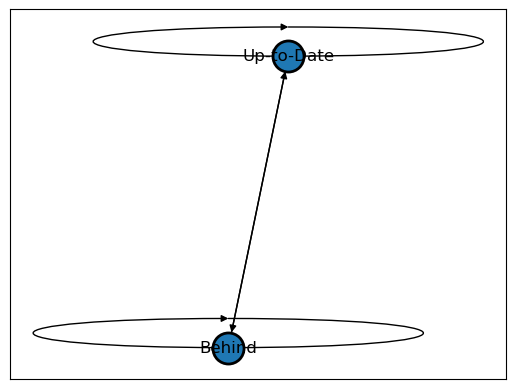

In [105]:

diagram = nx.DiGraph()
diagram.add_nodes_from(G.nodes())
diagram.add_edges_from(G.edges())

options = {  
    "node_size": 500,
    "edgecolors": "black",
    "linewidths": 2,
    "width": 1,
}

nx.draw_networkx(diagram,**options)

## Enlaces
* https://ipython-books.github.io/131-simulating-a-discrete-time-markov-chain/
* https://ipython-books.github.io/
* https://github.com/ipython-books/cookbook-2nd-code/blob/master/chapter13_stochastic/01_markov.ipynb
* http://www.emma-project.org/latest/
* https://www.datacamp.com/tutorial/markov-chains-python-tutorial
* https://github.com/jujuwong21/21344-Final-Project
* https://github.com/NikosNikolopoulos/StochasticProcesses
* https://www.cs.bu.edu/fac/crovella/cs132-book/L11MarkovChains.html